# EXERCISE 3.1: MULTI-CLASS CLASSIFICATION

*This is the programming assignment for **week 4** of the Stanford University **Machine Learning** course on coursera.org*

*This jupyter notebook is the python equivalent of the original MATLAB/Octave ``ex3.m``*

## Before you start

Read the original assignment document (ex3.pdf), this will guide you through the assignment.
Note that the PDF is the orginal document for the course which assumes you will be implementing the assignment in Matlab/Octave. 

Do not change any code in this nodebook file; your job is to implement the following:
- <u>Task 1</u>: lrCostFunctionReg.py
- <u>Task 2</u>: lrGradientDescent.py
- <u>Task 3</u>: oneVsAll.py
- <u>Task 4</u>: predictOneVsAll.py

Variable conventions:
- ``m`` : number of training examples (rows in the dataset) - scalar value
- ``n`` : number of features in the data (columns in the dataset, excluding the column with result values) - scalar value
- ``X_data`` : m x n matrix representing all input data - 2D array
- ``X`` : m x (n+1) design matrix, basically X_data preprended with a column of ones - 2D array
- ``y`` : m element result vector - 1D array
- ``theta`` : n+1 element fitting parameter vector - 1D array

In [1]:
# 3rd party libraries
import numpy as np
from scipy.io import loadmat
from datetime import datetime

# pre-defined functions 
from displayData import displayData

# user defined functions; you will be implementing these 
from lrCostFunction import lrCostFunction
from lrGradientDescent import lrGradientDescent
from oneVsAll import oneVsAll
from predictOneVsAll import predictOneVsAll

## Part 1: Loading and Visualizing Data 

*See paragraphs 1.1 and 1.2 of ex3.pdf*

We start the exercise by first loading and visualizing the dataset.

You will be working with a dataset that contains handwritten digits.

*No tasks*

In [2]:
# initialize parameters
input_layer_size  = 400;  # 20x20 Input Images of Digits
num_labels = 10;          # 10 labels, from 1 to 10
                          # (note that we have mapped "0" to label 10)

In [3]:
# load data
data = loadmat('ex3data1.mat')
X_data = data['X']
y = data['y'][:, -1]
print('y shape: ' + str(y.shape))

# determine number of examples
m = X_data.shape[0]


y shape: (5000,)


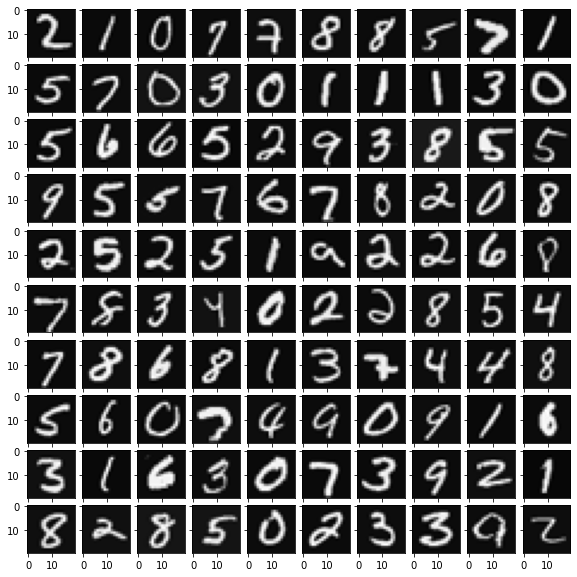

In [4]:
# select 100 random examples of X
sampleSize = 100
selection = X_data[np.random.choice(m, sampleSize, replace=False), :]

# display these 100 random examples in a grid
noColumns = 10
displayData(selection, noColumns)

## Part 2a: Vectorize Logistic Regression 

*See paragraph 1.3 of ex3.pdf*

In this part of the exercise, you will reuse your logistic regression code from the last exercise. 

Your task here is to make sure that your regularized logistic regression implementation is vectorized. 
After that, you will implement one-vs-all classification for the handwritten digit dataset.

<u>Task 1</u>: implement lrCostFunctionReg.py

<u>Task 2</u>: implement lrGradientDescent.py


In [5]:
# Testing lrCostFunction() with regularization
# (task 1: implement lrCostFunction.py)
theta_t = np.array([-2, -1, 1, 2])
X_t = np.array([[1, 0.1, 0.6, 1.1],
             [1, 0.2, 0.7, 1.2],
             [1, 0.3, 0.8, 1.3],
             [1, 0.4, 0.9, 1.4],
             [1, 0.5, 1,   1.5]])
y_t = np.array([1, 0, 1, 0, 1])
lambda_t = 3
J = lrCostFunction(theta_t, X_t, y_t, lambda_t)

In [6]:
# display J
J

2.534819396109744

*(Expected cost: 2.534819)*

In [7]:
# display gradients
# (task 2: implement lrGradientDescent.py)
grad = lrGradientDescent(theta_t, X_t, y_t, lambda_t)
grad

array([ 0.14656137, -0.54855841,  0.72472227,  1.39800296])

*(Expected gradients: 0.146561, -0.548558, 0.724722, 1.398003)*

## Part 2b: One-vs-All Training 

*See paragraph 1.4 of ex3.pdf*

<u>Task 3</u>: implement oneVsAll.py

In [8]:
llambda = 3

# Task 3: implement oneVsAll.py
all_theta = oneVsAll(X_data, y, num_labels, llambda)

         Current function value: 0.020151
         Iterations: 50
         Function evaluations: 169
         Gradient evaluations: 169
         Current function value: 0.026965
         Iterations: 50
         Function evaluations: 172
         Gradient evaluations: 172
         Current function value: 0.068709
         Iterations: 50
         Function evaluations: 141
         Gradient evaluations: 141
         Current function value: 0.071839
         Iterations: 50
         Function evaluations: 142
         Gradient evaluations: 142
         Current function value: 0.052091
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.077109
         Iterations: 50
         Function evaluations: 133
         Gradient evaluations: 133
         Current function value: 0.034825
         Iterations: 50
         Function evaluations: 161
         Gradient evaluations: 161
         Current function value: 0.046841
      

## Part 3: Predict for One-Vs-All 

*See paragraph 1.4.1 of ex3.pdf*

<u>Task 4</u>: implement predictOneVsAll.py

In [9]:
# predict categories
# (task 4: implement predictOneVsAll.py)
pred = predictOneVsAll(all_theta, X_data)

# determine and display accuracy
accuracy = np.mean(np.double(pred == y%10)) * 100
accuracy

94.32000000000001

*(Expected accuracy: 94.9)*